## Logistic Regression with Lasso Regularization

Lasso or L1 regularization is a regularization technique that seeks to zero out superfluous variables. 

Thus, this method performs both regression and feature selection at the same time. 

We will run this method and then explore retained features to get an idea about important features.

In [1]:
import os
import sys

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance

%matplotlib inline

In [2]:
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.utils import within_subject_functional_normalization

In [4]:
from src.config import AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES, var_name_to_feat
from src.utils import evaluate_scores, get_splits
from src.plots.misc import plot_hist

In [5]:
df = pd.read_csv("../data/master_functionals_new_features.csv")
df

,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
0,0,0,33.207450,0.188117,33.557415,35.970253,37.030464,3.473049,233.493740,237.09804,...,0,20.0,1.0,2,1.78,0.296667,1.0,1.0,0.0,0.0
1,1,0,31.973427,0.172323,24.031258,33.894035,36.294712,12.263454,36.486237,7.24742,...,1,80.0,1.0,2,1.58,0.395000,1.0,1.0,0.0,0.0
2,2,0,23.677464,0.129553,22.237234,23.013530,25.102104,2.864870,145.572220,159.39350,...,1,60.0,1.0,2,7.48,0.325217,5.0,1.0,0.0,0.0
3,3,0,33.611103,0.090990,33.551422,34.227577,34.913113,1.361690,123.937220,74.90742,...,1,100.0,2.0,2,0.09,0.090000,0.0,0.0,0.0,0.0
4,4,0,31.766670,0.110006,31.128075,31.511560,33.566906,2.438831,31.893764,36.00795,...,1,80.0,1.0,2,1.29,0.215000,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,3332,0,20.228983,0.246194,14.451830,20.386751,26.042356,11.590527,245.911530,198.15411,...,1,80.0,1.0,2,2.67,0.381429,3.0,1.0,0.0,0.0
3333,3333,0,31.126240,0.114296,31.571873,32.327450,32.699960,1.128086,324.486900,250.81499,...,1,80.0,2.0,2,1.00,0.166667,0.0,0.0,0.0,0.0
3334,3334,0,29.766552,0.129714,29.915512,30.895258,31.772797,1.857285,259.278050,369.85800,...,1,100.0,1.0,1,1.92,0.174545,0.0,0.0,0.0,0.0
3335,3335,0,33.463300,0.230548,24.733616,36.905180,38.047897,13.314281,255.713210,0.00000,...,1,100.0,1.0,1,0.00,0.000000,0.0,0.0,0.0,0.0


In [6]:
participant_ids = df["participant"].values
participant_ids

array([36, 21, 34, ..., 29, 37, 23])

In [7]:
df[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES] = within_subject_functional_normalization(
                                                df[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES],
                                                participant_ids,
                                                "standard")
df

,Unnamed: 0.1,Unnamed: 0,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,...,accuracy,confidence_level,confidence_type,free_cued_recall,CumPauseLength,MeanPauseSegmentLength,PausesAbove0.5Sec,PausesAbove1Sec,PausesAbove1.5Sec,PausesAbove2Sec
0,0,0,0.259983,0.332261,0.866330,0.506420,0.320359,-0.790661,0.054842,0.289241,...,0,20.0,1.0,2,0.064130,-0.079352,0.217061,0.942293,-0.490511,-0.429669
1,1,0,-0.717108,0.725696,-1.882271,-0.319202,-0.012434,1.862051,-0.836629,-0.675393,...,1,80.0,1.0,2,-0.091515,0.026350,0.220541,0.992432,-0.538028,-0.408248
2,2,0,-0.566677,-0.205434,-0.120069,-0.761264,-0.667896,-0.572266,0.024613,0.186602,...,1,60.0,1.0,2,5.475477,1.376780,6.037742,2.412091,-0.237356,0.000000
3,3,0,0.919177,-0.523623,1.150908,1.216159,0.367601,-0.741268,-0.271717,-0.377001,...,1,100.0,2.0,2,-0.756171,-0.630867,-0.715078,-0.456357,-0.313993,-0.232495
4,4,0,0.388853,-0.532196,0.628008,-0.127185,-0.194455,-0.701555,-0.916483,-0.569107,...,1,80.0,1.0,2,-0.393502,-0.349288,-0.095453,-0.621455,-0.502331,-0.443203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,3332,0,-0.450267,1.362586,-1.129102,-0.455241,0.339407,1.720947,0.798251,0.744770,...,1,80.0,1.0,2,0.455788,0.122313,1.659524,0.928705,-0.500835,-0.429669
3333,3333,0,-0.211937,-0.124017,0.559091,0.318900,-0.378290,-0.804033,0.598907,0.307612,...,1,80.0,2.0,2,-0.221153,-0.200000,-0.715078,-0.456357,-0.313993,-0.232495
3334,3334,0,0.043278,-0.212633,0.459059,0.032353,-0.061197,-0.793500,0.414662,1.239616,...,1,100.0,1.0,1,0.528203,-0.246869,-0.653204,-0.551487,-0.313050,0.000000
3335,3335,0,-1.120744,1.811996,-2.040631,0.103935,0.535386,2.230362,0.452582,-0.727131,...,1,100.0,1.0,1,-0.614963,-0.673075,-0.428496,-0.256495,-0.111803,0.000000


In [8]:
y = df["accuracy"].values
x = df[AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES].values

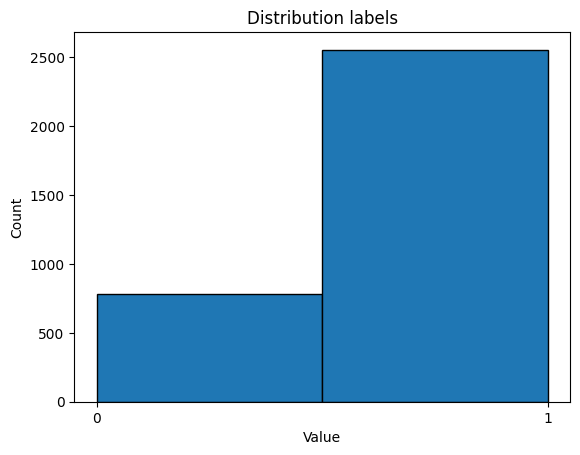

In [9]:
plot_hist(y, "labels")

In [10]:
# Create a LogisticRegression model with L1 (Lasso) regularization
lasso_logistic = LogisticRegression(penalty='l1', solver='liblinear', C=0.03)

evaluate_scores(x, y, lasso_logistic, "roc_auc")


printing roc_auc measures
avg (train): 0.6496926014892807
std (train): 0.006753227633612639
avg (validation): 0.6317582833070137
std (validation): 0.01870724346005126


In [11]:
scores = cross_validate(lasso_logistic, x, y, scoring="roc_auc", return_estimator=True)

In [12]:
scores["test_score"].argmax()

1

In [13]:
best_estimator = scores["estimator"][scores["test_score"].argmax()]

In [14]:
coeffs = []
for i in scores["estimator"]:
    coeffs.append(i.coef_)
    
coeffs_mat = np.vstack(coeffs)

## Feature importance 

**Positive coefficients**: Feature contributes to observation belonging to positive class (accurate statements).

 **Negative coefficients**: Feature contributes to observation belonging to negative class (inaccurate statements).


### Top 10 features

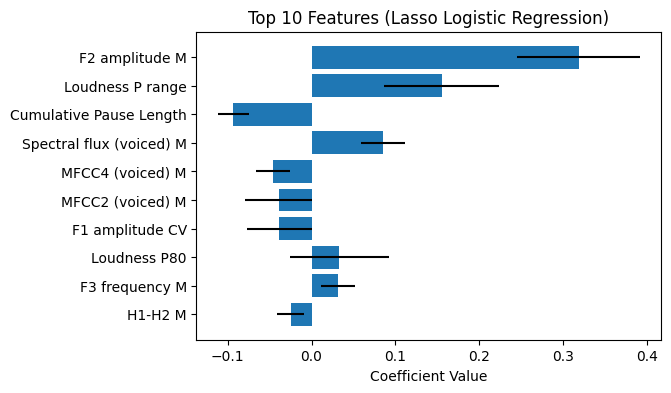

In [15]:
import numpy as np


from sklearn.preprocessing import normalize

normed_coeffs_mat = normalize(coeffs_mat, norm='l1')

coefficients_mean = np.mean(normed_coeffs_mat, axis = 0)
coefficients_std = np.std(normed_coeffs_mat, axis=0)


k = 10  # Adjust the number of top features to display
top_indices = np.abs(coefficients_mean).argsort()[-k:]
top_coefficients = coefficients_mean[top_indices]
top_feature_names = [AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES[i] for i in top_indices]

top_feature_pretty_names = []
for i in top_feature_names:
    top_feature_pretty_names.append(var_name_to_feat[i])

plt.figure(figsize=(6, 4))
plt.barh(top_feature_pretty_names, top_coefficients, xerr=coefficients_std[top_indices])
plt.xlabel('Coefficient Value')
plt.title(f'Top {k} Features (Lasso Logistic Regression)')
plt.show()

In [16]:
top_coefficients

array([-0.0249911 ,  0.03140784,  0.03330306, -0.03831543, -0.03924518,
       -0.04594428,  0.08552695, -0.09342591,  0.15491099,  0.31839592])

In [17]:
coefficients_std[top_indices]

array([0.01638469, 0.02058816, 0.05903364, 0.03827543, 0.03980609,
       0.0200845 , 0.02602467, 0.01850323, 0.06889249, 0.07339402])

In [18]:
df_coeff = pd.DataFrame({"feature": top_feature_pretty_names, "M": top_coefficients, "SD": coefficients_std[top_indices]})
df_coeff

,feature,M,SD
0,H1-H2 M,-0.024991,0.016385
1,F3 frequency M,0.031408,0.020588
2,Loudness P80,0.033303,0.059034
3,F1 amplitude CV,-0.038315,0.038275
4,MFCC2 (voiced) M,-0.039245,0.039806
5,MFCC4 (voiced) M,-0.045944,0.020084
6,Spectral flux (voiced) M,0.085527,0.026025
7,Cumulative Pause Length,-0.093426,0.018503
8,Loudness P range,0.154911,0.068892
9,F2 amplitude M,0.318396,0.073394


### All retained (non-zero coefficient) features

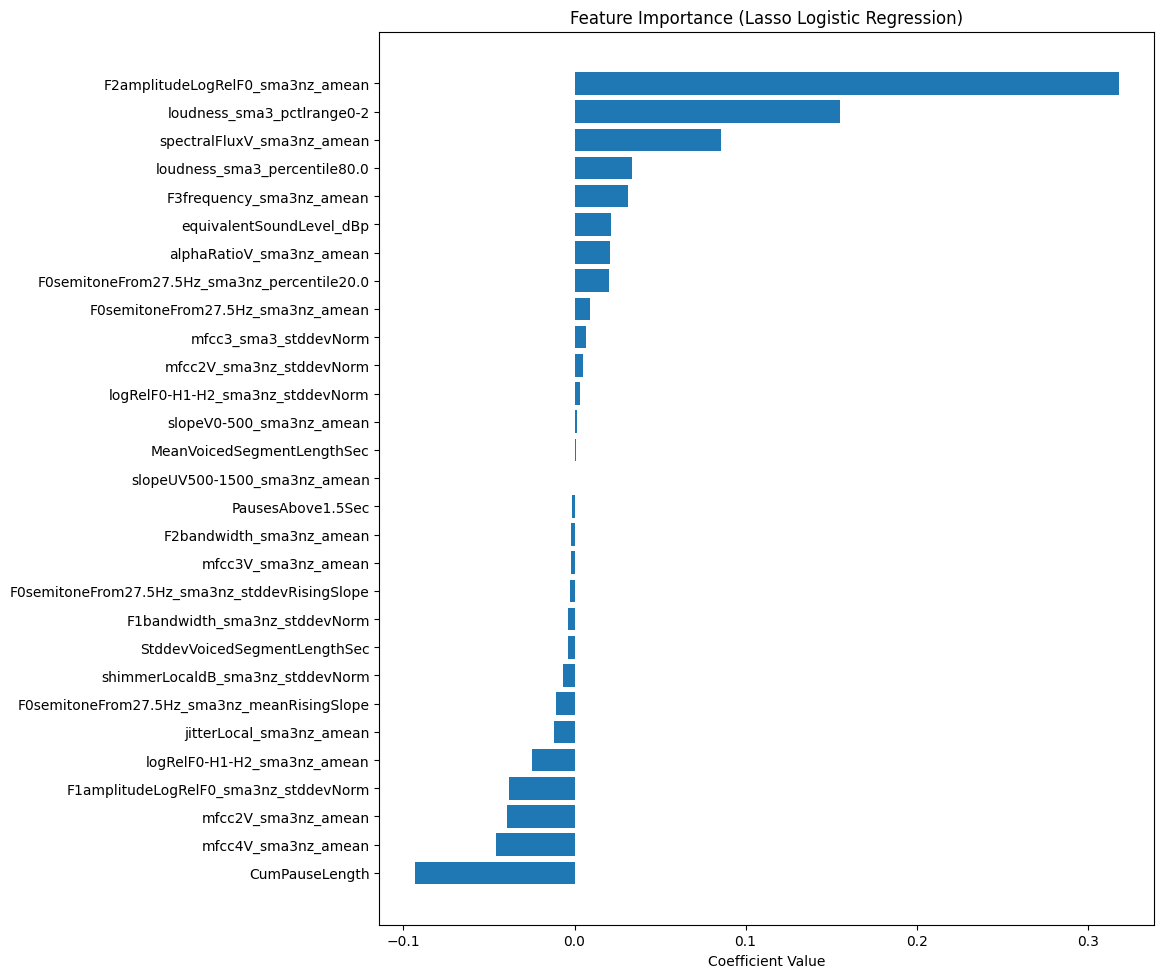

In [19]:
import matplotlib.pyplot as plt

feature_names = AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES 

# Filter out features with coefficient values of 0
nonzero_coefficients = coefficients_mean[coefficients_mean != 0]
nonzero_feature_names = [feature_names[i] for i, coef in enumerate(coefficients_mean) if coef != 0]

# Sort nonzero coefficients by absolute value
sorted_indices = nonzero_coefficients.argsort()
sorted_coefficients = nonzero_coefficients[sorted_indices]
sorted_feature_names = [nonzero_feature_names[i] for i in sorted_indices]

plt.figure(figsize=(10, len(sorted_feature_names) * 0.4))
plt.barh(sorted_feature_names, sorted_coefficients)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Lasso Logistic Regression)')
plt.show()

In [20]:
splits = get_splits(x, y)

importances = None

for train_index, val_index in splits:
    X_train, y_train = x[train_index], y[train_index]
    X_val, y_val = x[val_index], y[val_index]

    lasso_logistic.fit(X_train, y_train)

    result = permutation_importance(lasso_logistic, X_val, y_val, n_repeats=20, n_jobs=-1, scoring="roc_auc")

    if not type(importances) == np.ndarray:
        importances = result['importances']
    else:
        importances = np.hstack([importances, result['importances']])

In [21]:
d = {"importances": importances,
     "importances_mean": np.mean(importances, axis=1),
     "importances_std": np.std(importances, axis=1)}

perm_sorted_idx = d['importances_mean'].argsort()

In [22]:
AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES = np.asarray(AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES)

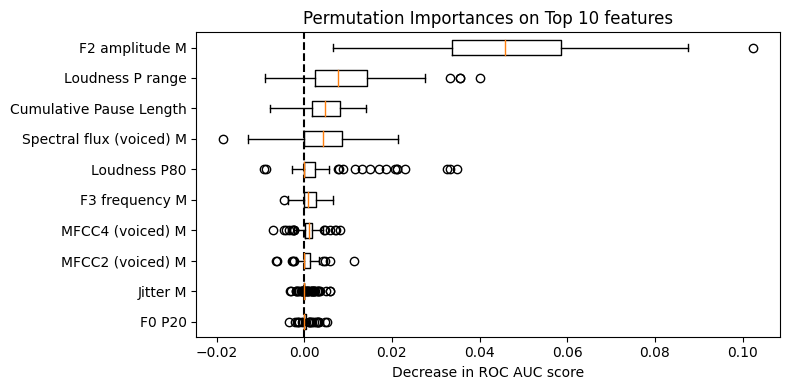

In [23]:
# Number of top features to display
top_n = 10

fig, ax = plt.subplots(figsize=(8, 4))

# Get the top N features and their importances
top_features = AUDIO_FUNCTIONALS_EGEMAPS_V2_COLS_NEW_FEATURES[perm_sorted_idx][-top_n:]
top_importances = importances[perm_sorted_idx].T[:, -top_n:]


top_features_pretty = []
for i in top_features:
    top_features_pretty.append(var_name_to_feat[i])


# Create the boxplot for the top features
ax.boxplot(top_importances, vert=False, labels=top_features_pretty)
ax.axvline(x=0, color="k", linestyle="--")

ax.set_title("Permutation Importances on Top 10 features")
ax.set_xlabel("Decrease in ROC AUC score")
ax.figure.tight_layout()
plt.show()

In [24]:
M = np.mean(top_importances, axis=0)
M

array([0.00030708, 0.0003909 , 0.00058001, 0.00095355, 0.00127881,
       0.00303921, 0.00404586, 0.00461335, 0.00903707, 0.04744086])

In [25]:
SD = np.std(top_importances, axis=0)
SD

array([0.00116059, 0.00143952, 0.00195989, 0.00226072, 0.00212374,
       0.00777652, 0.00625921, 0.00482092, 0.00985517, 0.01979498])

In [26]:
df_imp = pd.DataFrame({'feature':top_features_pretty, 'M':M, 'SD': SD})
df_imp

,feature,M,SD
0,F0 P20,0.000307,0.001161
1,Jitter M,0.000391,0.001440
2,MFCC2 (voiced) M,0.000580,0.001960
3,MFCC4 (voiced) M,0.000954,0.002261
4,F3 frequency M,0.001279,0.002124
5,Loudness P80,0.003039,0.007777
6,Spectral flux (voiced) M,0.004046,0.006259
7,Cumulative Pause Length,0.004613,0.004821
8,Loudness P range,0.009037,0.009855
9,F2 amplitude M,0.047441,0.019795
